In [1]:
%matplotlib notebook
from IPython.display import display
from IPython.html import widgets
from scripts.summary_plot import *
from scripts.average_plot import *

C:\Program Files\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# file_directory = "C:\Users\hanr\GitHub\SGM-Beamline\data\spectra_example.dat"
# print file_directory
file_directory = get_abs_path("data/spectra_example.dat")
print file_directory

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.dat


In [3]:
scan_num_array = getAllScanNum(file_directory)
print scan_num_array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
inputText = widgets.Text() 
def generate_array(sender):
	print inputText.value
inputText.on_submit(generate_array)
inputText

In [5]:
bad_scan = inputText.value
good_scan = generateGoodScanArray(scan_num_array, bad_scan)

These are the original scan numbers:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



## Open the data file

In [6]:
opened_file = openDataFile(file_directory)

## Create bins, assign data points & calculate the average

In [7]:
bins = 600
temp_array = prepare_average_plot (good_scan, opened_file, 690, 750, bins, 50, 80)
mean_energy_array = temp_array[0]
avg_mca = temp_array[1]
avg_scaler = temp_array[2]
pfy_data = temp_array[3]
print len(pfy_data[0])

Total scan:  10
Opened all scans.
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed

Start calcualting Average of MCA1, MCA2, MCA3 & MCA4...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Getting PFY ROIs
600


## Plot Average of MCAs, I0, TEY & Diode

Plotting XAS.


<IPython.core.display.Javascript object>


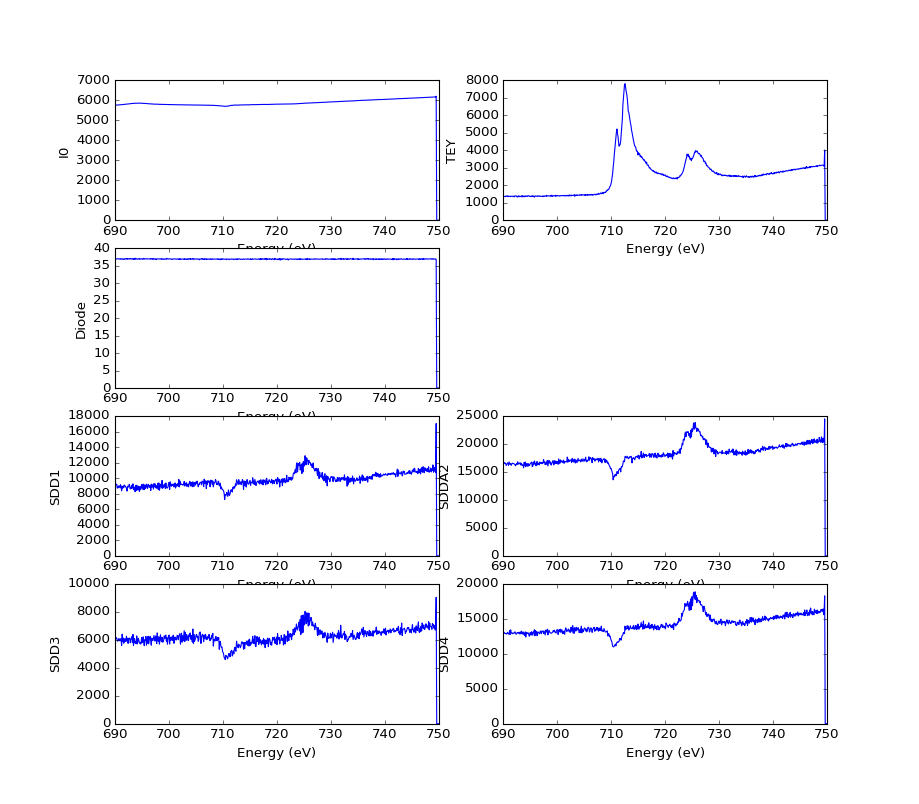

In [8]:
plot_avg_xas_all(mean_energy_array, avg_scaler, pfy_data)

<IPython.core.display.Javascript object>


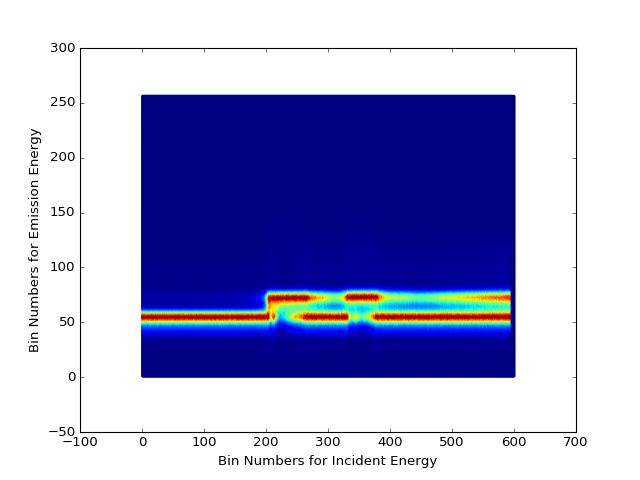

In [9]:
#plot avg of Mac 2 in color scatter plot
plotAvgOfMAC(bins, avg_mca[1])

## Plot Average of TEY

<IPython.core.display.Javascript object>


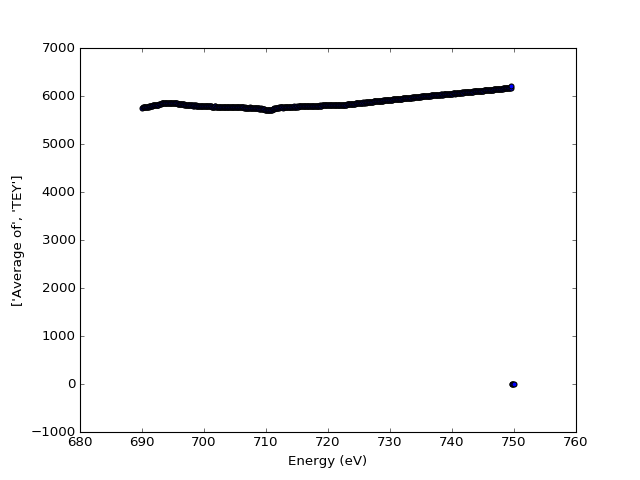

In [10]:
plot_one_avg_scaler(mean_energy_array, avg_scaler[1], "TEY")

Getting PFY ROIs


scripts\average_plot.py:358: RuntimeWarning: divide by zero encountered in divide
  new_mca_array.append( mca_avg_array[dividend_mca_index][i] / mca_avg_array[divisor_mca_index][i])
scripts\average_plot.py:358: RuntimeWarning: invalid value encountered in divide
  new_mca_array.append( mca_avg_array[dividend_mca_index][i] / mca_avg_array[divisor_mca_index][i])


<IPython.core.display.Javascript object>


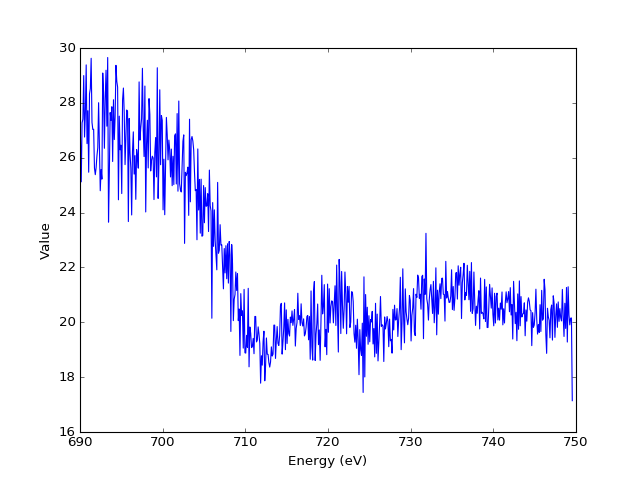

In [11]:
plot_mca_division(mean_energy_array, avg_mca, "MCA3", "MCA1", 50, 80)

In [12]:
from numpy import arange

In [13]:
with open(file_directory) as content:
    lines = content.readlines()

In [14]:
with open("output_data.xas", "w") as out_file:
    # write header into the data file
    out_file.write("SGM Datafile")
    out_file.write("\n")
    out_file.write("\n")
    for i in range (0, 19):
        out_file.write(lines[i])
    out_file.write("-----------------------------------------------------------")
    out_file.write("\n")
    
    # write table header into the data file
    out_file.write("Energy")
    out_file.write("\t")
    out_file.write("Average-TEY")
    out_file.write("\n")
    
    for i in range(0, len(mean_energy_array)):
        out_string = ""
        print mean_energy_array[i]
        out_string += str(mean_energy_array[i])
        out_string += "\t"
        out_string += str(avg_scaler[1][i])
        print avg_scaler[1][i]
        out_string += "\n"
        print out_string
        out_file.write(out_string)

690.05
5758.92307692
690.05	5758.92307692

690.15
5762.24137931
690.15	5762.24137931

690.25
5765.78378378
690.25	5765.78378378

690.35
5766.71428571
690.35	5766.71428571

690.45
5770.15151515
690.45	5770.15151515

690.55
5767.57692308
690.55	5767.57692308

690.65
5770.53125
690.65	5770.53125

690.75
5774.0
690.75	5774.0

690.85
5776.53846154
690.85	5776.53846154

690.95
5780.65517241
690.95	5780.65517241

691.05
5780.88461538
691.05	5780.88461538

691.15
5782.96296296
691.15	5782.96296296

691.25
5785.52173913
691.25	5785.52173913

691.35
5790.5862069
691.35	5790.5862069

691.45
5788.59259259
691.45	5788.59259259

691.55
5796.18181818
691.55	5796.18181818

691.65
5795.28
691.65	5795.28

691.75
5803.43333333
691.75	5803.43333333

691.85
5805.11538462
691.85	5805.11538462

691.95
5803.88
691.95	5803.88

692.05
5805.40909091
692.05	5805.40909091

692.15
5811.03846154
692.15	5811.03846154

692.25
5812.40909091
692.25	5812.40909091

692.35
5817.92307692
692.35	5817.92307692

692.45
5813.36